In [1]:
import tensorflow as tf
from tensorflow import keras

In [4]:

import numpy as np
import matplotlib.pyplot as plt

In [6]:
# The train_img and train_label arrays are the training set.
# The test_img and test_label arrays are the testing set.
# The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255
# The labels are an array of integers, ranging from 0 to 9.

df=keras.datasets.fashion_mnist     # load data
(train_img,train_label), (test_img,test_label)= df.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [11]:
#

classes=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [14]:
train_img.shape, train_label.shape, train_label

((60000, 28, 28), (60000,), array([9, 0, 0, ..., 3, 0, 5], dtype=uint8))

In [15]:
test_img.shape, test_label.shape, test_label

((10000, 28, 28), (10000,), array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

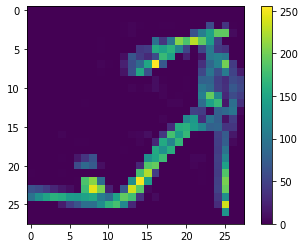

In [28]:
plt.figure()
plt.imshow(train_img[8])
plt.colorbar()

plt.show()

In [29]:
# We scale these values to a range of 0 to 1 before feeding to the neural network model. 
# For this, we divide the values by 255. 

train_img=train_img/255
test_img=test_img/255

<function matplotlib.pyplot.show(*args, **kw)>

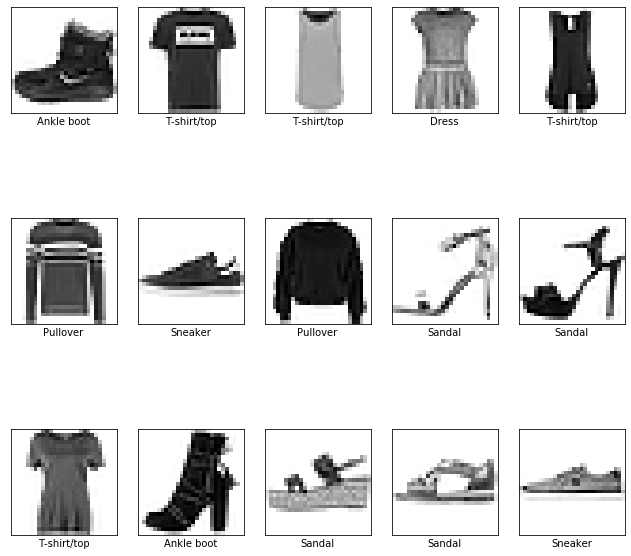

In [35]:
# Display the first 25 images from the training set and display the class name below each image

plt.figure(figsize=(11,11))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_img[i],cmap=plt.cm.binary)
    plt.xlabel(classes[train_label[i]])
plt.show

# model building

In [84]:
# The basic building block of a neural network is the layer. 
# Layers extract representations from the data fed into them.
# The first layer in this network, transforms the format of the images from a 2d-array (of 28 by 28 pixels),
# to a 1d-array of 28 * 28 = 784 pixels.
# The last layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. 
# Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.


model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)), keras.layers.Dense(128, activation=tf.nn.relu),
                       keras.layers.Dense(10, activation=tf.nn.softmax)])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
# Optimizer —This is how the model is updated based on the data it sees and its loss function.
# Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [39]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [40]:
# model training

model.fit(train_img, train_label, epochs=6)

Epoch 1/6
60000/60000 [==============================] - 10s 172us/step - loss: 0.5035 - acc: 0.8224
Epoch 2/6
60000/60000 [==============================] - 6s 102us/step - loss: 0.3741 - acc: 0.8655
Epoch 3/6
60000/60000 [==============================] - 6s 101us/step - loss: 0.3373 - acc: 0.8770
Epoch 4/6
60000/60000 [==============================] - 7s 115us/step - loss: 0.3119 - acc: 0.8858
Epoch 5/6
60000/60000 [==============================] - 7s 121us/step - loss: 0.2938 - acc: 0.8920
Epoch 6/6
60000/60000 [==============================] - 7s 115us/step - loss: 0.2794 - acc: 0.8961


In [46]:
# compare how the model performs on the test dataset:

test_loss, test_acc= model.evaluate(test_img, test_label)
print('test accuracy:', test_acc)
print('test loss:', test_loss)

10000/10000 [==============================] - 0s 43us/step
test accuracy: 0.8777
test loss: 0.34407011816501615


In [47]:
# make prediction

predict_value=model.predict(test_img)

In [55]:
np.argmax(predict_value[8])   # rediction on test dataset

5

In [57]:
np.argmax(predict_value[8]), test_label[8]       # cross check

(5, 5)

In [71]:
# keras models are optimized to make predictions on a batch, or collection, of examples at once. 
# So even though we're using a single image, we need to add it to a list:

img=test_img[45]
img.shape

(28, 28)

In [72]:
img=np.expand_dims(img,0)

In [73]:
img.shape

(1, 28, 28)

In [76]:
predicted_value=model.predict(img)
print(predicted_value)
print(np.argmax(predicted_value))

[[7.1639888e-04 1.6016982e-05 1.0120341e-04 1.8912939e-05 5.8425147e-05
  6.1997622e-02 6.7648792e-04 7.1832168e-01 1.0775970e-03 2.1701564e-01]]
7


In [77]:
classes[np.argmax(predicted_value)]

'Sneaker'

In [81]:
actual_value=test_label[45]
classes[actual_value]

'Sneaker'

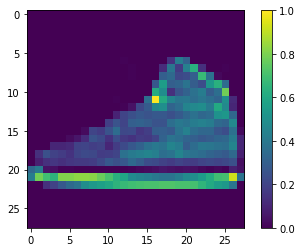

In [82]:
plt.imshow(test_img[45])
plt.colorbar()
plt.show()